For this project i have selected the following models

1) Decision tree

2) Perceptron (using the multilayerperceptron.py from the exercises)

maximum = -0.65 for depth = 7


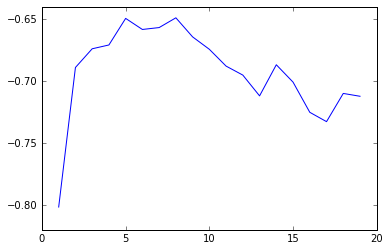

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pl
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
import MultiLayerPerceptron as mlp
%matplotlib inline

##########################################
###                                    ###
###         DECISION TREE              ###
###         training the model         ###
###                                    ###
##########################################

#read and randomly shuffle data
wines = pd.read_csv('winequality.csv', sep=';').as_matrix()
wines = wines[np.random.permutation(wines.shape[0]),:]

#assign x and y
X = wines[:,0:-1]
y = wines[:,-1]

#the number of folds
folds = 5

#tree depth
maxdepth=20

#array to put scores in
allScores = []

for d in range(1,maxdepth):
    
    #tree model
    model = tree.DecisionTreeClassifier(max_depth = d)

    #evaluate
    scores = model_selection.cross_val_score(model, X, y, cv=5,scoring='neg_mean_squared_error')
    allScores.append(scores.mean())

    #print results
    #print("depth = %d" % (d))
    #print("cross validation scores:")
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    #print("\n")
    
print("maximum = %0.2f for depth = %d" % (np.max(allScores),allScores.index(np.max(allScores))))

#plot data
pl.figure()
pl.plot(range(1,maxdepth),allScores)

pl.show()

This first block creates decision trees with depths ranging from 1 to 20.
the average error for each depth is a negative number and therefor we calculate the maximum.

The ideal depth changes between runs, ranging from 4-8 with an average error of arround 0.65

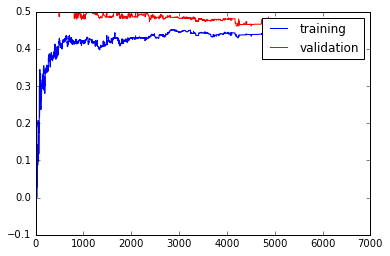

In [30]:
##########################################
###                                    ###
###         DECISION TREE              ###
###         learning curve             ###
###                                    ###
##########################################

#split data
Xtrain, Xval, ytrain, yval = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)

num_samples = np.arange(1,len(y))

#tree depth
depth=allScores.index(np.max(allScores))

#results on training/validation set
train_score = np.zeros(len(num_samples))
val_score = np.zeros(len(num_samples))

for idx,samples in enumerate(num_samples):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(Xtrain[0:samples,:],ytrain[0:samples])
    train_score[idx] = model.score(Xtrain[0:samples,:],ytrain[0:samples])
    val_score[idx] = model.score(Xval,yval)
    
#plot learning curves
plt.figure()
plt.ylim((-0.1,0.5))
#error rate = 1.0 - accurracy
plt.plot(num_samples,1.0-train_score,label='training')
plt.plot(num_samples,1.0-val_score,'r',label='validation')
plt.legend()
plt.show()

This second block compares the model on a training set and a validation set.
We can clearly see the pattern of high bias emerging, signifying that our model is not complex enough to accurately represent the pattern inside the data.

a solution is to use a more complex model.

Optimization terminated successfully.
         Current function value: 0.538252
         Iterations: 113
         Function evaluations: 217
         Gradient evaluations: 217
Optimization terminated successfully.
         Current function value: 0.538501
         Iterations: 133
         Function evaluations: 258
         Gradient evaluations: 258
Optimization terminated successfully.
         Current function value: 0.532976
         Iterations: 103
         Function evaluations: 184
         Gradient evaluations: 184
Optimization terminated successfully.
         Current function value: 0.539648
         Iterations: 103
         Function evaluations: 193
         Gradient evaluations: 193
Optimization terminated successfully.
         Current function value: 0.556494
         Iterations: 97
         Function evaluations: 191
         Gradient evaluations: 191
Optimization terminated successfully.
         Current function value: 0.525122
         Iterations: 423
         Function eva

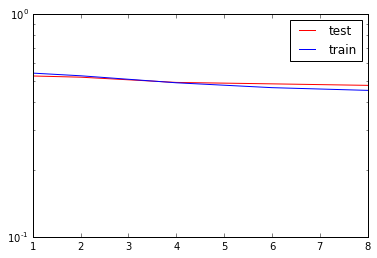

In [10]:
##########################################
###                                    ###
###          PERCEPTRON                ###
###                                    ###
##########################################

#hidden layers
numhidden = [1,2,4,6,8]

#array to put scores in
restest = np.zeros(len(numhidden))
restrain = np.zeros(len(numhidden))

#scale network input data
scaler = preprocessing.StandardScaler().fit(X)
Xn = scaler.transform(X)

#random states for splitting data (this process replaces cross-validation)
randoms = [10,18,25,36,42]

#first loop, iterate with different hidden layers
ind=0
for h in numhidden:
    #neural network model
    net = mlp.MultiLayerPerceptron(11,h, 1, outfun=mlp.linear, scorefun='mse')
        
    #results on training/validation set
    train_score = np.zeros(len(randoms))
    val_score = np.zeros(len(randoms))
    
    #second loop, iterate with different splits
    ind2=0    
    for rand in randoms:
        #split data
        Xtrain, Xval, ytrain, yval = cross_validation.train_test_split(Xn,y, test_size=0.2, random_state=rand)

        #evaluate
        net.fit(Xtrain,ytrain)
        train_score[ind2] += net.score(Xtrain,ytrain) # 0 + value
        val_score[ind2] += net.score(Xval,yval)       # 0 + value
        ind2 += 1
    restrain[ind] = train_score.mean() #mean of all splits
    restest[ind] = val_score.mean()     #mean of all splits
    ind +=1
    
    #reset arrays
    train_score = np.zeros(len(randoms))
    val_score = np.zeros(len(randoms))

    
print("train minimum = %0.2f for %d hidden layers" % (np.min(restrain),numhidden[np.where(restrain == np.min(restrain))[0][0]]))
print("test minimum = %0.2f for %d hidden layers" % (np.min(restest),numhidden[np.where(restrain == np.min(restrain))[0][0]]))
#plot performance
pl.figure()
pl.semilogy(numhidden,restest,'r',label='test')
pl.semilogy(numhidden,restrain,label='train') #use log scale for y axis
pl.legend()
pl.show()
#l.plot(numhidden,allScores_train)

This block handles the perceptron model.
Because the perceptron model is not handled by the cross_validation module, i simulated my own cross validation, using a double loop.
The first loop iterates over the different hidden layers: 1,2,3,4,5
while the second loop iterates over the random seeds for splitting the data 10,18,25,36,42

The test and training results are quit similar, indicating no underfitting or overfitting

This data allows us to objectively decide that the perceptron model performs better with an average error of 0.45 compared to an average error of 0.65 for decision trees.

Note that the calculated results are floating points, while the target values are integers.
We could possibly round off the results to the nearest integer.